# Zadatci za vježbu (s prošlog predavanja)

1. Odredite LU faktorizaciju matrice $A=\begin{bmatrix} 7& 2 &1\\ 18& 9& 8\\ 49& 35& 37\end{bmatrix}$
2. Za gornju matricu koristeći njenu $LU$ faktorizaciju riješite sustav $Ax=b$ ako je $b=\begin{bmatrix}6\\ 17\\ 51\end{bmatrix}$
3. Zadatke 1. i 2. ponovite za matricu $A=\begin{bmatrix} 2& 2 &3\\ 3& 4& 4\\ 15& 18& 17\end{bmatrix}$ i vektor $b=\begin{bmatrix}-3\\ -3\\ -14\end{bmatrix}$ 
4. Zadana je matrica $$A=\begin{bmatrix}a_{11}& a_{12}& a_{13}\\
a_{21}& a_{22}& a_{23}\\
a_{31}& a_{32}& a_{33}\end{bmatrix}.$$
Odredite matricu iz $\mathbf{R}^{3\times 3}$ koja množenjem matrice $A$ s lijeva vrši množenje drugog retka matrice $A$ sa $7$ i dodaje rezultat trećem retku. 

U sljedećem videu možete pogledati rješenja ovih zadataka.

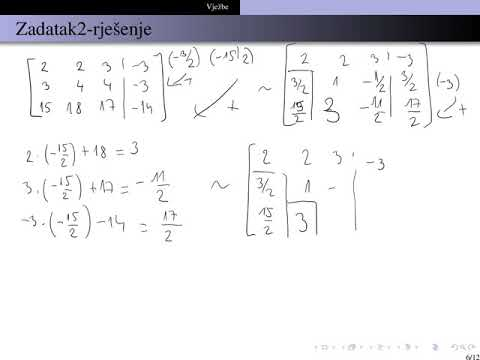

In [1]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("kzMaHhbHilI")
display(vid)

# Pseudokod (LU faktorizacija)

Pogledajmo sada pseudokod rješavanja matrice, pri tome uočimo da ponovno koristimo matricu $A$ kako bismo uštedili memoriju računala kao što je to prikazano "na papiru" u prethodnom videu u sklopu ovog predavanja. U donji trokut spremamo multiplikatore (odnosno brojeve $\mu_k^{(i)}$) i u u donjem trokutu u krajnjem zapisu imamo sve elemente koji su ispod dijagonale u matrici $L$. U gornjem trokutu je zapisana matrica $U$
![pseudokod](pseudokod.png)


U gornjem pseudokodu  ćemo primjerice za $n=5$ i $k=3$ računati


$i=4$, $\mu=\frac{a_{43}}{a_{33}},$ te ćemo postaviti $a_{43}=\mu$ (multiplikatore spremamo u donji trokut)


$\quad j=4, \ a_{44}=a_{44}-\mu a_{34}$


$\quad j=5,\ a_{45}=a_{45}-\mu a_{35}$


$i=5, \mu=\frac{a_{53}}{a_{33}},\quad a_{53}=\mu.$



# Pseudokod (Rješavanje sustava)


![sustav](sustav.png)

Uočimo da u gornjem algoritmu linije 3-7 rješavaju sustav $Ly=b$ odnosno imamo supstitucije unaprijed. Kako bismo uštedjeli na memorijskom prostoru, rezultat ćemo pospremiti u vektor $b$. 
Primjerice ako imamo sustav reda 5 
$$\begin{bmatrix}1&0&0&0&0\\
*&1&0&0&0\\
*&*&1&0&0\\
*&*&*&1&0\\
*&*&*&*&1\end{bmatrix}\begin{bmatrix}x_1\\y_2\\ y_3\\y_4\\y_5\end{bmatrix}=\begin{bmatrix}b_1\\b_2\\b_3\\b_4\\b_5\end{bmatrix}
$$
tada je $y_1=b_1$, no mi ćemo umjesto u novi vektor $y$ podatke pospremiti u vektor $b$ pa pišemo $b_1=b_1$. Za drugu jednadžbu bismo imali $y_2=b_2-a_{21}b_1$, (uočite da je u element $a_{21}$ pospremljen multiplikator) pa pišemo $b_2=b_2-a_{21}b_2$, $b_3=b_3-a_{31}b_1$, $b_4=b_4-a_{41}b_1$  itd.

Linije 8-14 rješavaju sustav $Ux=y$ odnosno u našoj notaciji sada $Ux=b$, te rezultat ponovno pospremamo u vektor $b$. 
Primjerice da imamo sustav reda 5 
$$\begin{bmatrix}*&*&*&*&*\\
0&*&*&*&*\\
0&0&*&*&*\\
0&0&0&*&*\\
0&0&0&0&*\end{bmatrix}\begin{bmatrix}x_1\\x_2\\ x_3\\x_4\\x_5\end{bmatrix}=\begin{bmatrix}b_1\\b_2\\b_3\\b_4\\b_5\end{bmatrix}
$$
imamo $x_5=\frac{b_5}{a_{55}}$ ali implementiramo $b_5=\frac{b_5}{a_{55}}$ itd.

Izlaz: Rješenje spremljeno u vektor $b.$

#  Složenost algoritma Gaussovih eliminacija

Pokažimo da je složenost algoritma Gaussovih eliminacija $O(\frac{2}{3}n^3)$

*Napomena i zadatak*: U sljedećem videu na samom kraju vidjet ćete implementaciju napisanu u Matlabu! Za vježbu razmisliti o navedenoj implementaciji u Pythonu, koja će biti dana na jednom od sljedećih predavanja!

In [5]:
vid = YouTubeVideo("Dq40ZAJmGcI ")
display(vid)

Prilikom prebrojavanja računskih operacija u algoritmu za računanje $LU$ faktorizacije matrice vidjeli smo da moramo odraditi sljedeći broj operacija
$$\sum_{k=1}^{n-1}(n-k)(2(n-k)+1)$$
U gornjoj sumi možemo uvesti indeks $j=n-k$, te nam tada $k=1\Rightarrow j=n-1 $ i $k=n-1\Rightarrow j=1.$
Sada vrijedi
$$S_1=\sum_{k=1}^{n-1}(n-k)(2(n-k)+1)=\sum_{j=1}^{n-1}j(2j+1)=\sum_{j=1}^{n-1}j+2\sum_{j=1}^{n-1}j^2$$
Sada koristimo znanje iz Matematike 1 (navedene formule za ove sume smo obrađivali prvom tjednu nastave Matematike 1 uz matematičku indukciju) i dobivamo
$$S_1=\frac{n(n-1)}{2}+2\frac{(n-1)n(2n-1)}{6}=n(n-1)\frac{4n+1}{6}.$$

U algoritmu za rješvanje sustava vidjeli smo da je ukupan broj računskih operacija bio jednak S_2+S_3 gdje je
$$S_2=\sum_{k=1}^{n-1}2(n-k)=\sum_{j=1}^{n-1}2j=n(n-1)$$


$$S_3=1+\sum_{i=1}^{n-1}(2(n-i)+1)=[l=n-i]=1+\sum_{l=1}^{n-1}(2l+1)=1+2\frac{n(n-1)}{2}+n-1=1+(n-1)(n+1)$$
Uočimo da je
$$n(n-1)+(n-1)(n+1)+1=2n^2-n.$$
Dakle, ukupan broj računskih operacija potrebam da odredimo rješenje sustava $n$ jednadžbi sa $n$ nepoznanica je 
$$n(n-1)\frac{4n+1}{6}+2n^2-n=\frac{2}{3}n^3+\frac{3}{2}n^2-\frac{7}{6}n=O(\frac{2n^3}{3})$$

# Mogući problemi
Razmislimo sada koji nam se **problemi** mogu javiti prilikom provođenja $LU$ faktorizacije. To su
1. **Pivotni element je 0.**


Npr.Imamo matricu $A=\begin{bmatrix} 0& 1\\
1&0\end{bmatrix}$ i želimo provesti algoritam za $LU$ faktorizaciju koji smo opisali, naići ćemo na problem: *Možemo li uopće poništiti element $a_{21}$? Znači li to da $LU$ faktorizacija ne postoji*


**Uočimo!**Ako zamijenimo retke ove matrice "problem" iz gornjih pitanja nestaje :).

**Pitanje!** Ima li svaka regularna matrica $LU$ rastav? 

(odgovor: Nema, kao što to vidimo u primjeru za gornju matricu $A$, jer navedena matrica je regularna. Nadalje, postoje i singularne matrice koje imaju $LU$ rastav. Primjer jedna takve matrice je $B=\begin{bmatrix}1&1\\1& 1\end{bmatrix}$)


2.** Ako imamo malu vrijednost za pivotni element! **



I maleni pivotni element može biti problem!. Vidjet ćemo na sljedećem predavanju.

# Pivotiranje

Sada ćemo opisati kada nastaje potreba za "pivotiranjem"

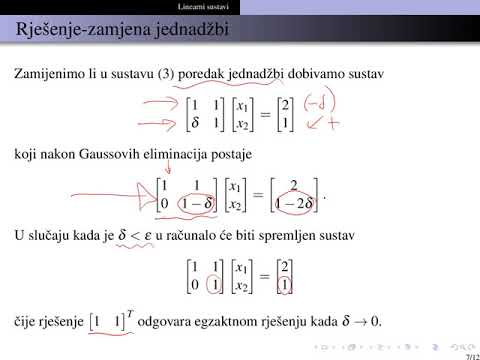

In [2]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("97PMccV56v8")
display(vid)

Pogledajmo sada kako možemo odrediti matrice $P$, $L$, i $U$ u računanju  $LU$ faktorizacije s parcijalnim pivotiranjem na primjeru jedne matrice reda $4\times 4$, no u praksi se ovaj postupak ne primjenjuje. Sljedeći je video važan da znamo s kojim matricama se množi u kojem koraku, odnosno da razumijemo postupak, i donekle predstavlja teorijski dio gradiva,, ali opisan na primjeru!

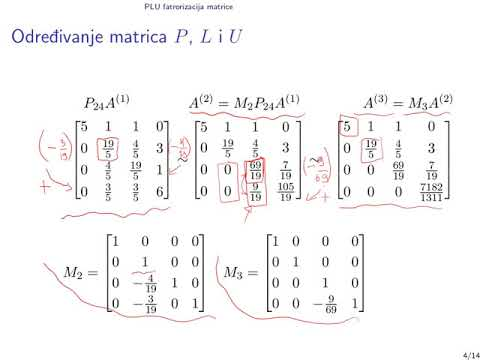

In [3]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("kNbNvxmdJho")
display(vid)

U sljedećem dijelu predavanja pokazat ćemo kako brzo možemo provoditi $PLU$ faktorizaciju te kako je efikasno zapisati.

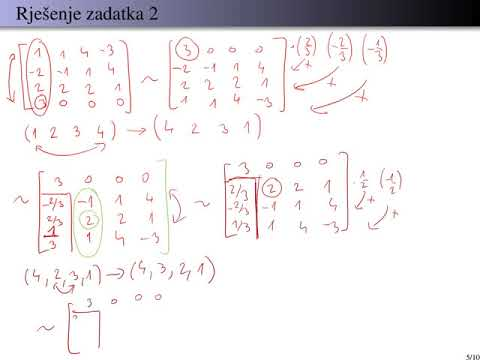

In [4]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("lkdY_DCFsE4")
display(vid)